**Metrics used: MSE, MAE, R2**

Accuracy, Precision, Recall, and F2 score are not used because this deals with regression and not classification.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold
import numpy as np
import matplotlib.pyplot as plt
# from lazypredict.Supervised import LazyRegressor
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


# Descriptor Dataset Preparation
Note: Run the last cell only, the first few cells just show how the y is derived from a different dataset.

In [ ]:
# Preparing the X and Y Data Matrices
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CSCI 114 Final Project/acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv')
df_X = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CSCI 114 Final Project/descriptors_output.csv')

# Y Variable

df_Y = df['pIC50']

# Combining X and Y Variables in a Dataset

dataset = pd.concat([df_X, df_Y], axis=1)

In [ ]:
dataset

Name  PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  \
0      CHEMBL336398           1           1           1           0   
1      CHEMBL133897           1           1           1           0   
2      CHEMBL130628           1           1           1           0   
3      CHEMBL131588           1           1           0           0   
4      CHEMBL130478           1           1           0           0   
...             ...         ...         ...         ...         ...   
4690  CHEMBL4293155           1           1           1           1   
4691  CHEMBL4282558           1           1           1           1   
4692  CHEMBL4281727           1           1           1           1   
4693  CHEMBL4292349           1           1           1           1   
4694  CHEMBL4278260           1           1           1           1   

      PubchemFP4  PubchemFP5  PubchemFP6  PubchemFP7  PubchemFP8  ...  \
0              0           0           0           0           0  ...   
1              0           0           0           0           0  ...   
2              0           0           0           0           0  ...   
3              0           0           0           0           0  ...   
4              0           0           0           0           0  ...   
...          ...         ...         ...         ...         ...  ...   
4690           0           0           0           0           0  ...   
4691           0           0           0           0           0  ...   
4692           0           0           0           0           0  ...   
4693           0           0           0           0           0  ...   
4694           0           0           0           0           0  ...   

      PubchemFP872  PubchemFP873  PubchemFP874  PubchemFP875  PubchemFP876  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
4690             0             0             0             0             0   
4691             0             0             0             0             0   
4692             0             0             0             0             0   
4693             0             0             0             0             0   
4694             0             0             0             0             0   

      PubchemFP877  PubchemFP878  PubchemFP879  PubchemFP880     pIC50  
0                0             0             0             0  6.124939  
1                0             0             0             0  7.000000  
2                0             0             0             0  4.301030  
3                0             0             0             0  6.522879  
4                0             0             0             0  6.096910  
...            ...           ...           ...           ...       ...  
4690             0             0             0             0  5.612610  
4691             0             0             0             0  5.595166  
4692             0             0             0             0  5.419075  
4693             0             0             0             0  5.460924  
4694             0             0             0             0  5.555955  

[4695 rows x 883 columns]

In [ ]:
dataset = dataset.drop(columns=['Name']) # We do not need the name
dataset

PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  PubchemFP5  \
0              1           1           1           0           0           0   
1              1           1           1           0           0           0   
2              1           1           1           0           0           0   
3              1           1           0           0           0           0   
4              1           1           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
4690           1           1           1           1           0           0   
4691           1           1           1           1           0           0   
4692           1           1           1           1           0           0   
4693           1           1           1           1           0           0   
4694           1           1           1           1           0           0   

      PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9  ...  PubchemFP872  \
0              0           0           0           1  ...             0   
1              0           0           0           1  ...             0   
2              0           0           0           1  ...             0   
3              0           0           0           1  ...             0   
4              0           0           0           1  ...             0   
...          ...         ...         ...         ...  ...           ...   
4690           0           0           0           1  ...             0   
4691           0           0           0           1  ...             0   
4692           0           0           0           1  ...             0   
4693           0           0           0           1  ...             0   
4694           0           0           0           1  ...             0   

      PubchemFP873  PubchemFP874  PubchemFP875  PubchemFP876  PubchemFP877  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
4690             0             0             0             0             0   
4691             0             0             0             0             0   
4692             0             0             0             0             0   
4693             0             0             0             0             0   
4694             0             0             0             0             0   

      PubchemFP878  PubchemFP879  PubchemFP880     pIC50  
0                0             0             0  6.124939  
1                0             0             0  7.000000  
2                0             0             0  4.301030  
3                0             0             0  6.522879  
4                0             0             0  6.096910  
...            ...           ...           ...       ...  
4690             0             0             0  5.612610  
4691             0             0             0  5.595166  
4692             0             0             0  5.419075  
4693             0             0             0  5.460924  
4694             0             0             0  5.555955  

[4695 rows x 882 columns]

In [ ]:
# Download CSV for Model Building
dataset.to_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

In [ ]:
'''
The Acetylcholinesterase data set contains 881 input features and 1 output variable (pIC50 values).

pIC50 is a measurement used in pharmacology and biochemistry to express the effectiveness of a drug or compound in
inhibiting a specific biological or biochemical function.

IC50: inhibition concentration at 50%

If a drug has a pIC50 of 8, it’s quite potent, whereas a pIC50 of 5 would mean it’s less effective in causing inhibition

'''

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CSCI 114 Final Project/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')
X = df.drop('pIC50', axis=1)
Y = df.pIC50

# Remove low variance features

'''
If a feature has a variance below 0.16, it will be removed.
This threshold is often chosen when we want to remove features that are almost constant.
'''

selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

# Train test split in 80/20 ratio

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Classical Models

MSE:  1.3527144183833741
MAE:  0.8517286862120975
R2:  0.4392133624285369


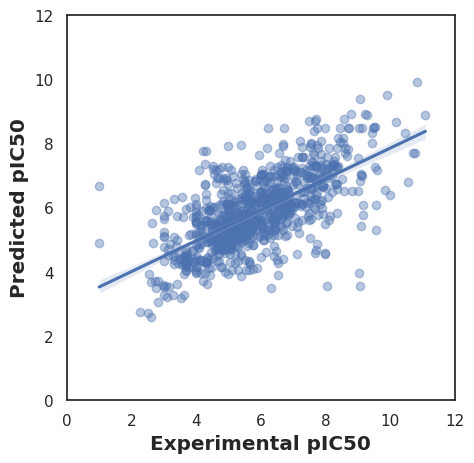

In [ ]:
# KNN


# Initialize the model
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Save the trained model
joblib.dump(model, 'KNN.joblib')

# Print performance metrics
print('MSE: ', mse)
print('MAE: ', mae)
print('R2: ', r2)

# Plotting
sns.set(color_codes=True)
sns.set_style("white")

# Create the regression plot with x and y specified as keyword arguments
ax = sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha': 0.4})

# Customize the plot's appearance
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)  # Adjust limits as needed
ax.set_ylim(0, 12)  # Adjust limits as needed
ax.figure.set_size_inches(5, 5)

# Display the plot
plt.show()

MSE:  1.6456902932950503
MAE:  0.9852639572083557
R2:  0.3177561253735587


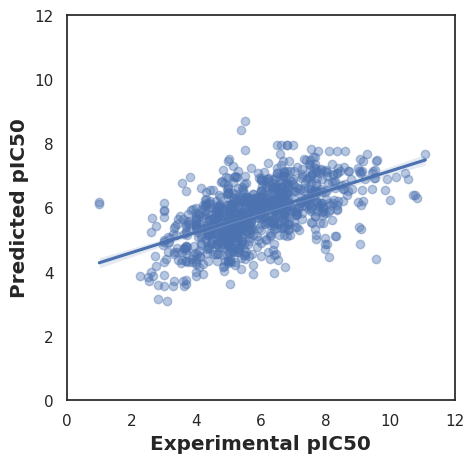

In [ ]:
# Linear Regression

# Initialize the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Save the trained model
joblib.dump(model, 'LinearRegression.joblib')

# Print performance metrics
print('MSE: ', mse)
print('MAE: ', mae)
print('R2: ', r2)

# Plotting
sns.set(color_codes=True)
sns.set_style("white")

# Create the regression plot with x and y specified as keyword arguments
ax = sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha': 0.4})

# Customize the plot's appearance
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)  # Adjust limits as needed
ax.set_ylim(0, 12)  # Adjust limits as needed
ax.figure.set_size_inches(5, 5)

# Display the plot
plt.show()

MSE:  1.5872608920511664
MAE:  0.8489012022715758
R2:  0.34197884896811515


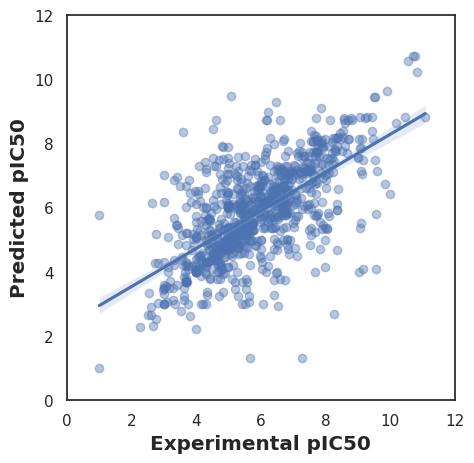

In [ ]:
# Decision Tree Regression

# Initialize the model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Save the trained model
joblib.dump(model, 'DecisionTree.joblib')

# Print performance metrics
print('MSE: ', mse)
print('MAE: ', mae)
print('R2: ', r2)

# Plotting
sns.set(color_codes=True)
sns.set_style("white")

# Create the regression plot with x and y specified as keyword arguments
ax = sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha': 0.4})

# Customize the plot's appearance
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)  # Adjust limits as needed
ax.set_ylim(0, 12)  # Adjust limits as needed
ax.figure.set_size_inches(5, 5)

# Display the plot
plt.show()

MSE:  1.1583861302759328
MAE:  0.7416937678500622
R2:  0.5197748658706518


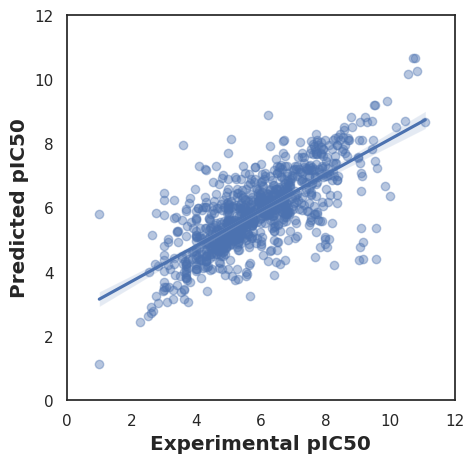

In [ ]:
# Random Forest Regression

# Set the random seed for reproducibility
np.random.seed(100)

# Initialize the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Save the trained model
joblib.dump(model, 'RandomForest.joblib')

# Print performance metrics
print('MSE: ', mse)
print('MAE: ', mae)
print('R2: ', r2)

# Plotting
sns.set(color_codes=True)
sns.set_style("white")

# Create the regression plot with x and y specified as keyword arguments
ax = sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha': 0.4})

# Customize the plot's appearance
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)  # Adjust limits as needed
ax.set_ylim(0, 12)  # Adjust limits as needed
ax.figure.set_size_inches(5, 5)

# Display the plot
plt.show()

# Neural Network

In [ ]:
X_train_dataset = torch.tensor(X_train, dtype=torch.float32)
X_test_dataset = torch.tensor(X_test, dtype=torch.float32)

y_train_dataset = torch.tensor(y_train.to_numpy(), dtype=torch.float32).view(-1, 1)
y_test_dataset = torch.tensor(y_test.to_numpy(), dtype=torch.float32).view(-1, 1)

Epoch [100/1800], Loss: 2.3808
Epoch [200/1800], Loss: 1.6786
Epoch [300/1800], Loss: 1.3648
Epoch [400/1800], Loss: 1.2029
Epoch [500/1800], Loss: 1.0912
Epoch [600/1800], Loss: 0.9997
Epoch [700/1800], Loss: 0.9274
Epoch [800/1800], Loss: 0.8633
Epoch [900/1800], Loss: 0.8073
Epoch [1000/1800], Loss: 0.7589
Epoch [1100/1800], Loss: 0.7157
Epoch [1200/1800], Loss: 0.6785
Epoch [1300/1800], Loss: 0.6471
Epoch [1400/1800], Loss: 0.6181
Epoch [1500/1800], Loss: 0.5909
Epoch [1600/1800], Loss: 0.5683
Epoch [1700/1800], Loss: 0.5483
Epoch [1800/1800], Loss: 0.5300


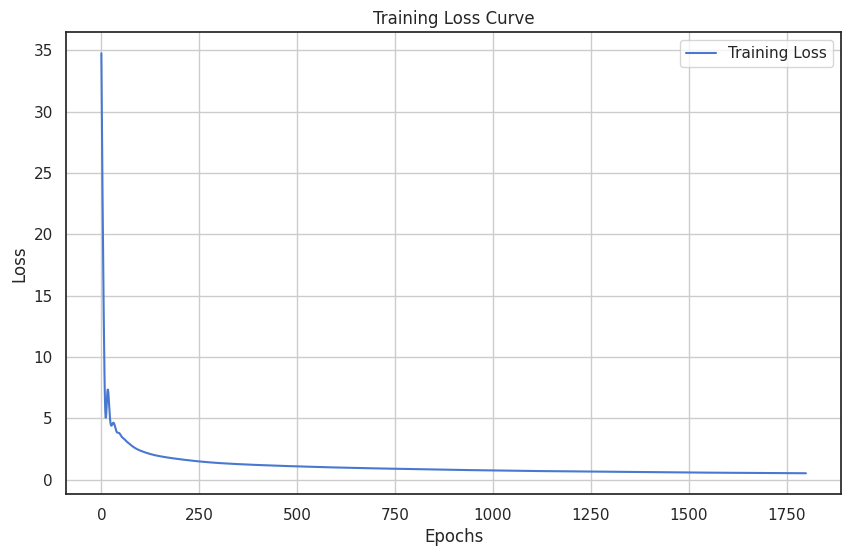

MSE: 1.3181
MAE: 0.8247
R2: 0.4535


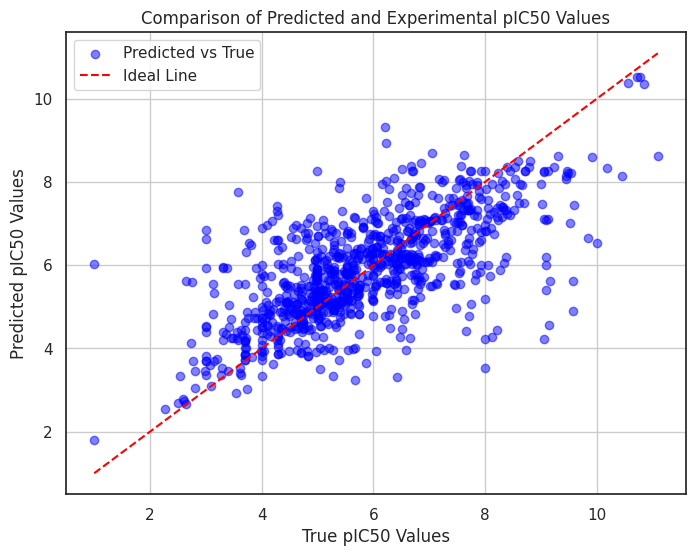

In [ ]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)  # Unsqueeze to match the output shape
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# Define the Neural Network model
class RegressionNN(nn.Module):
    def __init__(self, input_dim, hidden_dim=400):
        super(RegressionNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, 1)  # Output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # ReLU activation
        x = self.fc2(x)
        return x

# Initialize the model
input_dim = X_train.shape[1]  # Number of features
model = RegressionNN(input_dim=input_dim).to('cuda' if torch.cuda.is_available() else 'cpu')

# Define loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Training the model
epochs = 1800
train_losses = []

for epoch in range(epochs):
    model.train()

    # Forward pass
    predictions = model(X_train_tensor)
    loss = loss_fn(predictions, y_train_tensor)

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Store loss for plotting
    train_losses.append(loss.item())

    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

torch.save(model.state_dict(), 'regressionNN_model.pth')
# Plot training loss curve
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

# Make predictions on the test set
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor).cpu().numpy()

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print performance metrics
print(f'MSE: {mse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R2: {r2:.4f}')

# Visualize the predicted vs. true values
sns.set(style='white', palette='muted')

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, c='blue', label='Predicted vs True')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Line')
plt.xlabel('True pIC50 Values')
plt.ylabel('Predicted pIC50 Values')
plt.title('Comparison of Predicted and Experimental pIC50 Values')
plt.legend()
plt.grid(True)
plt.show()